<a href="https://colab.research.google.com/github/ekene0013/Projects-from-WQU-on-Financial-Markets/blob/main/GWP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project 1

In [ ]:
#!pip install numpy
#!pip install yfinance as yf
#!pip install jinja2

In [ ]:
#%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style="darkgrid")

## Step 1: Investments

1. U.S. Treasury Bills - 5 Years (^FVX)
2. Apple Stock (AAPL)
3. Dogecoin (DOGE-USD)
4. Residential and Multisector ETF (REZ)
5. Blockchain ETF(BLOK)

In [ ]:
def stock_Data(ls,start_date,end_date):
    data=pd.DataFrame()
    for i in ls:
        st=yf.download(i, start=start_date, end=end_date)["Adj Close"]
        st=st.reindex(st.index.strftime('%Y/%m/%d')).rename(i)
        data=pd.concat([data,st],axis=1)
    return data

In [ ]:
# Define the stocks and the time period for which you want to pull data
stock = ["^FVX","AAPL", "DOGE-USD",'REZ',"BLOK"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)

In [ ]:
df=stock_Data(stock,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Drop the NA values

In [ ]:
port=df.dropna(axis = 0, how = 'any')
port

,^FVX,AAPL,DOGE-USD,REZ,BLOK
2020/02/03,1.343,75.596817,0.002440,71.647301,16.325932
2020/02/04,1.424,78.092545,0.002503,72.022987,16.584389
2020/02/05,1.460,78.729340,0.002582,71.738930,16.713619
2020/02/06,1.460,79.650238,0.002653,72.261238,16.754972
2020/02/07,1.401,78.567581,0.002769,72.352859,16.679157
...,...,...,...,...,...
2023/01/26,3.588,143.960007,0.086373,73.589996,18.709999
2023/01/27,3.621,145.929993,0.087123,74.720001,18.980000
2023/01/30,3.683,143.000000,0.088337,73.620003,18.430000
2023/01/31,3.638,144.289993,0.096167,75.510002,18.889999


## 3 year Market Closing Price

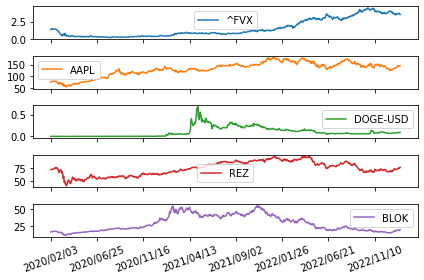

In [ ]:
port.plot(subplots=True)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Daily Precentage Returns

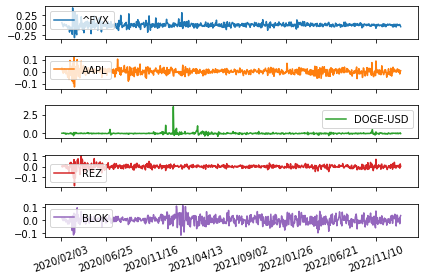

In [ ]:
returns=port.pct_change()
returns.plot(subplots=True)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Statistics

In [ ]:
ret=returns.mean(axis=0).rename('Mean Daily Return')
var=returns.var(axis=0).rename('Variance')
std=returns.std(axis=0).rename('Standard Deviation')
skew = returns.skew(axis=0).rename('Skewness')
kurt = returns.kurt(axis=0).rename ('Kurtosis')
stats = pd.concat([ret,var,std,skew,kurt],axis=1)
stats

,Mean Daily Return,Variance,Standard Deviation,Skewness,Kurtosis
^FVX,0.003039,0.003612,0.060102,0.851724,9.060492
AAPL,0.001137,0.000541,0.023251,0.089819,4.048920
DOGE-USD,0.011849,0.026859,0.163888,14.327572,294.635042
REZ,0.000264,0.000376,0.019391,-1.203495,14.309010
BLOK,0.000675,0.000870,0.029501,-0.146873,1.270066


### Covariance

In [ ]:
cov=returns.cov()
cov

,^FVX,AAPL,DOGE-USD,REZ,BLOK
^FVX,0.003612,0.000183,0.000097,0.000227,0.000172
AAPL,0.000183,0.000541,0.000163,0.000239,0.000396
DOGE-USD,0.000097,0.000163,0.026859,0.000263,0.001071
REZ,0.000227,0.000239,0.000263,0.000376,0.000230
BLOK,0.000172,0.000396,0.001071,0.000230,0.000870


### Pearson Correlation

In [ ]:
returns.corr(method='pearson')

,^FVX,AAPL,DOGE-USD,REZ,BLOK
^FVX,1.000000,0.130747,0.009864,0.194573,0.096775
AAPL,0.130747,1.000000,0.042713,0.530059,0.577295
DOGE-USD,0.009864,0.042713,1.000000,0.082604,0.221496
REZ,0.194573,0.530059,0.082604,1.000000,0.402483
BLOK,0.096775,0.577295,0.221496,0.402483,1.000000


### Spearman Correlation

In [ ]:
returns.corr(method='spearman')

,^FVX,AAPL,DOGE-USD,REZ,BLOK
^FVX,1.000000,-0.014631,-0.023092,-0.009362,0.068778
AAPL,-0.014631,1.000000,0.240162,0.420158,0.578098
DOGE-USD,-0.023092,0.240162,1.000000,0.204550,0.466821
REZ,-0.009362,0.420158,0.204550,1.000000,0.357960
BLOK,0.068778,0.578098,0.466821,0.357960,1.000000


## Portfolio B

Portfolio B Weights
$$ \text{Weights} = [0,0,0.4,0.2,0.4]$$

In [ ]:
weight=np.array([0,0,0.4,0.2,0.4])
weight

array([0. , 0. , 0.4, 0.2, 0.4])

Portfolio B Returns

In [ ]:
port_return = np.matmul(weight,ret)
port_return

0.005062280146110981

Portfolio B Variance

In [ ]:
port_var= np.matmul(np.transpose(weight),np.matmul(cov,weight))
port_var

0.004873273177341687

Portfolio Coefficient of variation

In [ ]:
(port_var**.5)/port_return

13.789997999873949

## Step 2: See Answers to Questions

**1. Shorting**

a. Yes
    
b. The mechanics would include borrowing an investment from another investor, sell the borrowed investment, wait for the price to drop and then buy back the same investment. Afterwards, I return the investment to the investor that I borrowed it from. The rationale for this mechanics would be to make some profit from the difference between the buy-back price and the price that I sold the investment for.  
    
**2. Credit Risk**

a. No
    
b. I am not shorting any position and most of my investments are in ETFs and cryptocurrency. I would have been exposed to credit risk if I lent any of my assets to another investors in which case I will be worried about the investor's credit rating, industry sector and history of default rates.  
    
**3. Portfolio Statistics**

a. 0.005062280146110981
    
b. 0.004873273177341687
    
**4. Diversification**

a. Diversification between two assets (in my case, ETFs and cryptocurrency) refers to the process of allocating investments across the assets in the portfolio so that they are not perfectly correlated with each other. This way, if one asset performs poorly, the other asset in the portfolio may still perform well, minimizing the the impact of the poor performance on the overall portfolio.   
    
b. Yes, the portfolio is diversified because my investment is spread across two assets with correlations of 0.08 (between the cryptocurrency and Equity ETF) and 0.22 (between the cryptocurrency and crypto ETF).
    
**5. Comparing Portfolios**

a. Portfolio A has a higher variance compared to my  portfolio. My portfolio in turn has a higher variance compared to portfolio C. The higher the variance, the higher the risks. Portfolio A and B has higher number of crypotcurrencies, which are known to be highly volatile compared to other traditional financial securities in portfolio C.
    
b. Portfolio A has a higher reyrun than my portfolio, while my portfolio has a higher return compared to portfolio C. This means that despite the fact that it has a higher risk, portfolio A yields returns than my portfolio.
    
**6. Assessing Risk**

a. My portfolio is made up of crypocurrencies and ETFs, and therefore affected by the followings: (i) regulatory changes can affect the acceptability of cryptocurrencies or can impact demand of equity ETFs (ii) interest rate changes can also affect cryptocurrencies as higher interest rates can make investment in traditional financial assets more attractive. The same way, changes in interest rates can impact the demand for equity ETFs, as higher interest rates can make investments in bonds and other fixed income securities more attractive (iii) market volatility can affect cryptocurrencies and ETF because investors may become more risk-averse and sell off assets (cryptocurrencies and ETFs) during periods of market stress.

b. Yes, all the scenarios listed in (a) above can affect all the investments in my portfolio. These events include regulatory changes, interest rate changes, and market volatility.
    
**7. Performance**

a. The investments in cryptocurrencies and ETFs can benefit from the followings: (i) period of economic growth and booms can lead to higher demands for crypotcurrencies and ETFS (ii) institutional investments in cryptocurrencies and ETFs can boost these assets because it incentives institutional investors to inject large amounts of capital into the market and drive up their demand.
    
b. As listed in the  scenarios listed above, the portfolio can be helped by similar events which include period of economic growth and booms, as well as institutional investments. These events can help both members of the portfolio.
    
**8. Disrupters**

a. (i) The central bank can affect my portfolio (made up of cryptocurrencies and ETFs) through its impact on monetary policy decisions, such as changes in interest rates. For example, if the central bank raises interest rates, it may lead to a higher value in token money and decrease in demand for cryptocurrencies and ETFs as investment may shift their capital to higher-yielding assets; (ii) The central bank can affect my portfolio through their regulatory function by supporting or opposing the development of cryptocurrencies and ETFs. For example, if the central bank issues guidelines to make investments in cryptocurrencies and ETFs difficult, it may affect the demand for these assets; (iii) The central bank can influence public perception of cryptocurrencies and ETFs through their statements and actions. For example, if the central bank endorses investments in cryptocurrencies and ETF through their communiques or moral suasion on commerical banks, it may increase public confidence in these assets and boost the demand for them.
    
b. (i) Investment banks can affect the portfolio through its impact on trading and as market makers for cryptocurrencies and ETFs, through the provision of liquidity and helping to facilitate trades. The impact of investment banks can, by extension, influence the supply and demand of cryptocurrencies and ETFs; (ii) Investment banks can influence the portfolio through advisory services to companies looking to launch cryptocurrencies or ETFs by offering guidance on regulatory compliance; (iii) Investment banks can affect the portfolio by offering investment management services for cryptocurrencies and ETFs by helping clients buy and sell assets as part of their portfolios.
    
**9. Re-assessing Risk**

a. No. The skewness between the cryptocurrency (Dogecoin) is much higher than that of the ETFs (Residential & Multisector ETF as well as the Blockchain ETF). Therefore, the cryptocurrency is much more heavily skewed to the right than the ETFs.  
    
b. Yes. We see some differences between the types of correlation. For example, the pearson correlation coefficient between cryptocurrency and Residential & Multisector ETF is 0.08 while the Spearman rank correlation coefficient is 0.20.

## Portfolio C

Portfolio Weights
$$ \text{Weights} = [0.5,0,0.8,-0.2,-0.1]$$

In [ ]:
weight=np.array([0.5,0,0.8,-0.2,-0.1])
weight

array([ 0.5,  0. ,  0.8, -0.2, -0.1])

Portfolio C Returns

In [ ]:
port_return = np.matmul(weight,ret)
port_return

0.010877992816946614

Portfolio C Variance

In [ ]:
port_var= np.matmul(np.transpose(weight),np.matmul(cov,weight))
port_var

0.017885742825756622

Portfolio Coefficient of Variation

In [ ]:
(port_var**.5)/port_return

12.294325954940595

## Step 2: See Answers to Questions

**1. Shorting**

a. Yes
    
b. The idea here is to borrow a security from another investor, and sell it so as to buy it back after the price of that security drops. The motivation for this is to make some gain from the selling and buy-back margin.  
    
**2. Credit Risk**

a. Yes. Since I am shorting my position, I would be exposed to creadit risk partcularly if I do the shorting via the over-the-counter (OTC) market.
    
b. Credit risk refers to the risk of losing an investment when a borrower's defaults by failing to repay the worth of an investment.
    
**3. Portfolio Statistics**

 a. 0.01088442110361956
    
b. 0.017926984537564562
    
**4. Diversification**

 a. The two assets in question here are treasury bills (TBs) and cryptocurrency (Dogecoin). Diversification here means that I allocated my investments between a very stable security (TBs) and a volatile security (Dogecoin) which are not perfectly correlated with each other. I also short my positions on the ETFs. Tne rationale behind diversifying my portfolio is to minimize the impact of the poor performance of one asset on the overall portfolio.  
    
b. Yes, my portfolio is well-diversified. For example, the pearson correlation beween the TBs and Dogecoin is 0.0098 suggesting that they are uncorrelated.
    
**5. Comparing Portfolios**

a. Apparently, portfolios A and B have higher portfolio returns than Portfolio C. However, the portfolio variances of portfolios A and B are higher than that of Portfolio C. Therefore, assessing my portfolio in terms of other indicates that it bears less risk due to relatively smaller variances, but has lower returns. This simply confirms the long held maxim in the world of finance which say, "the higher the risk, the higher the returns."
    
b. Following the discussion in the previous question, we already established that Portfolios A and B have higher portfolio returns than Portfolio C.
    
**6. Assessing Risk**

a. My portfolio is largely made up of treasury bills (TBs) and cryptocurrencies, and are therefore affected by the following economic conditions: (i) interest rates changes can make TBs more attractive and reduce the demand for cryptocurrencies; (ii) inflationary pressure can increase the demand cryptocurrencies as a hedge against currency depreciation and TBs are backed by the federal government and thereby, less senstive to inflation; (iii) economic growth and boom can increase both the demand for TBs and cryptocurencies.

b. (i) Geopolitical events can hurt both members of my portfolio. For example, tensions between countries can increases the demand for safe-haven assets such as TBs and cryptocurrencies; (ii) Technological shocks can affect the demand for cryptocurrencies but may not impact on TBs
    
**7. Performance**

a. (i) Economic prosperity or boom, as opposed to recessions, can greatly improve my securities; (ii) Hyperinfaltion can improve the demand for each security as cryptocurrencies can serve as a hedge against depreciation while TBs are less sensitive to inflation.
    
b. Events similar to the ones highlighted above would help members of my portfolio. For example, huge exchange rate depreciation, which also goes hand-in-hand with inflation, will help cryptocurrencies and TBs.
    
**8. Disrupters**

a. The central bank can influence the portfolio through monetary policy instruments such as (i) interest rates e.g. rasing the interest rates makes TBs attractive and decreases the demand for cryptocurrencies; (ii) money supply because increase in money supply can cause liquidity to increase in the market leading to more investments in TBs and cryptocurrencies.
    
b. Investment banks can influence the portfolio by (i) providing professional advisory services for TBs and cryptocurrencies leading to informed decisions by their clients regarding both securities (ii) offering investment management services for securities in my portfolio in order to increase or decrease the demand for securities in my portfolio

**9. Re-assessing Risk**

a. No. The skewness between TBs is higher than that of cryptocurrency.
    
b. Yes. The pearson correlation and spearman rank correlation coefficients are different for both TBs and cryptocurrency. In fact, pearson correlation is postive for TBs and cryptocurrency and on the other hand, negative when calculuted using the spearman rank.
    